In [1]:
#DATA PREPROCESSING

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style="whitegrid")

In [3]:
#LOAD BOTH DATASETS

sentiment_df=pd.read_csv("C:/Users/abign/Downloads/bitcoin_sentiment.csv")
trader_df = pd.read_csv("C:/Users/abign/Downloads/hyperliquid_trader_data.csv")
# Preview the data
display(sentiment_df.head())
display(trader_df.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
# Remove spaces from column names
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()
#These lines remove any leading or trailing spaces from column names in both trader_df and sentiment_df.
#Sometimes when data is imported (especially from CSVs or Excel files), column names might accidentally have invisible spaces—like
#" Timestamp IST " instead of "Timestamp IST". Those little quirks can cause errors later when you try to reference the column and wonder why it’s not being recognized.


In [7]:
#Make Sure the Column is Actually a Datetime
#- I converted the date column in sentiment_df and the Timestamp IST column in trader_df to proper datetime objects using pd.to_datetime().
#- By setting errors='coerce',  pandas turns any invalid date formats into NaT (Not a Time), which helps avoid exceptions from malformed entries.

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
trader_df['Timestamp IST']  = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

#CHECKING COLUMNS
print(sentiment_df.columns)
print(trader_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [11]:
#explicitly converting it to datetime before using .dt.date.
# Convert Timestamp to datetime:

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], dayfirst=True)
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])

# Extract just the date part
sentiment_df['date'] = sentiment_df['date'].dt.date
trader_df['date'] = trader_df['Timestamp'].dt.date

# Merge on date
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

# View merged result
print(merged_df.head())

trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])

Empty DataFrame
Columns: [Account, Coin, Execution Price, Size Tokens, Size USD, Side, Timestamp IST, Start Position, Direction, Closed PnL, Transaction Hash, Order ID, Crossed, Fee, Trade ID, Timestamp, date, timestamp, value, classification]
Index: []


In [13]:
#an attribute error occured so, you made sure the column is actually a datetime an then this is runned
sentiment_df['date'] = sentiment_df['date'].dt.date
trader_df['date'] = trader_df['Timestamp'].dt.date

merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

# Show the result
merged_df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [15]:
print("Trader dates:\n", trader_df['date'].unique())
print("Sentiment dates:\n", sentiment_df['date'].unique())


Trader dates:
 [datetime.date(1970, 1, 1)]
Sentiment dates:
 [datetime.date(2018, 1, 2) datetime.date(2018, 2, 2)
 datetime.date(2018, 3, 2) ... datetime.date(2025, 12, 4)
 datetime.date(2025, 1, 5) datetime.date(2025, 2, 5)]


In [17]:
#Checking original data type and sample values:
print(trader_df['Timestamp'].head(10))
print(trader_df['Timestamp'].dtype)
 

0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
5   1970-01-01 00:28:50
6   1970-01-01 00:28:50
7   1970-01-01 00:28:50
8   1970-01-01 00:28:50
9   1970-01-01 00:28:50
Name: Timestamp, dtype: datetime64[ns]
datetime64[ns]


In [57]:
# datetime values arent up to date so changing it
# Replace 'Timestamp' with 'Timestamp IST' for real dates
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST']).dt.date
#CONFIRMING WHETHER IT WORKED
print("Corrected trader dates:\n", trader_df['date'].unique()[:10])
# Convert both to datetime.date 
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'], errors='coerce').dt.date


Corrected trader dates:
 [datetime.date(2024, 2, 12) datetime.date(2024, 3, 12)
 datetime.date(2024, 4, 12) datetime.date(2025, 4, 3)
 datetime.date(2025, 5, 3) datetime.date(2025, 11, 3) NaT
 datetime.date(2025, 8, 4) datetime.date(2025, 9, 4)
 datetime.date(2025, 10, 4)]


In [59]:
#Check how many dates are valid:

print(trader_df['Timestamp'].isna().sum())  # how many missing?
print(trader_df['Timestamp'].min())         # earliest valid date
print(trader_df['Timestamp'].max())         # latest valid date

0
1970-01-01 00:28:00
1970-01-01 00:29:10


In [61]:
#Drop rows with missing or invalid timestamps:

trader_df = trader_df.dropna(subset=['Timestamp'])


In [63]:
print("Unique trader dates:", trader_df['date'].nunique())
print("Total trader rows:", len(trader_df))
print("Unique sentiment dates:", sentiment_df['date'].nunique())
print("Total sentiment rows:", len(sentiment_df))

Unique trader dates: 188
Total trader rows: 211224
Unique sentiment dates: 1046
Total sentiment rows: 2644


In [65]:
# MEMORY ERROR HAS OCCURED, SO COMPREESING THE DATA WITH 3 MONTHS OF THE DATASET
# droping duplicates by date in either dataset
trader_df_dedup = trader_df.drop_duplicates(subset='date')
sentiment_df_dedup = sentiment_df.drop_duplicates(subset='date')

#merging the smaller frames
merged_df = pd.merge(trader_df_dedup, sentiment_df_dedup, on='date', how='inner')
print("Merged shape:", merged_df.shape)

Merged shape: (189, 20)


In [67]:
#checking data frame size

print("Trader Data:", trader_df.shape)
print("Sentiment Data:", sentiment_df.shape)


Trader Data: (211224, 17)
Sentiment Data: (2644, 4)


In [69]:
# Convert date to datetime if not already
trader_df['date'] = pd.to_datetime(trader_df['date'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Set a range — adjust if needed
start_date = "2025-03-01"
end_date = "2025-06-01"

# Filter
trader_small = trader_df[(trader_df['date'] >= start_date) & (trader_df['date'] < end_date)]
sentiment_small = sentiment_df[(sentiment_df['date'] >= start_date) & (sentiment_df['date'] < end_date)]

print("Filtered trader data:", trader_small.shape)
print("Filtered sentiment data:", sentiment_small.shape)


Filtered trader data: (16231, 17)
Filtered sentiment data: (12, 4)


In [71]:
#REDUCED  DATA being  MERGING THEM NOW
merged_df = pd.merge(trader_small, sentiment_small, on='date', how='inner')
print("Merged shape:", merged_df.shape)
merged_df.head()


Merged shape: (16231, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.60975,2834.9,1728.58,BUY,2025-04-03 23:23:00,0.0,Open Long,0.0,0x6062349d392719a20336041ee797e502012c0064a4a2...,77138632929,True,0.580802,9.810000e+14,1970-01-01 00:29:00,2025-04-03,1741066200,15,Extreme Fear
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.60975,190.9,116.40,BUY,2025-04-03 23:23:00,2834.9,Open Long,0.0,0x6062349d392719a20336041ee797e502012c0064a4a2...,77138632929,True,0.039110,8.320000e+14,1970-01-01 00:29:00,2025-04-03,1741066200,15,Extreme Fear
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.60976,2818.6,1718.67,BUY,2025-04-03 23:23:00,3025.8,Open Long,0.0,0x6062349d392719a20336041ee797e502012c0064a4a2...,77138632929,True,0.577472,7.030000e+14,1970-01-01 00:29:00,2025-04-03,1741066200,15,Extreme Fear
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.60981,3689.6,2249.95,BUY,2025-04-03 23:23:00,5844.4,Open Long,0.0,0x6062349d392719a20336041ee797e502012c0064a4a2...,77138632929,True,0.755984,8.730000e+14,1970-01-01 00:29:00,2025-04-03,1741066200,15,Extreme Fear
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.61007,3688.1,2250.00,BUY,2025-04-03 23:23:00,9534.0,Open Long,0.0,0x6062349d392719a20336041ee797e502012c0064a4a2...,77138632929,True,0.755999,9.680000e+14,1970-01-01 00:29:00,2025-04-03,1741066200,15,Extreme Fear


In [35]:
#TASK- MERGE BOTH DATA AFTER FILTERING
merged_small = pd.merge(trader_small, sentiment_small, on='date', how='inner')



In [37]:
#Average PnL vs Sentiment Classification
merged_small.groupby('classification')['Closed PnL'].mean()


classification
Extreme Fear    111.128492
Fear            134.397964
Greed           118.084472
Neutral          43.721076
Name: Closed PnL, dtype: float64

In [39]:
#. Buy/Sell Ratio per Sentiment Class
merged_small[['value', 'Closed PnL']].corr()


,value,Closed PnL
value,1.000000,0.004656
Closed PnL,0.004656,1.000000


<Axes: title={'center': 'Sentiment Distribution per Day'}, xlabel='date'>

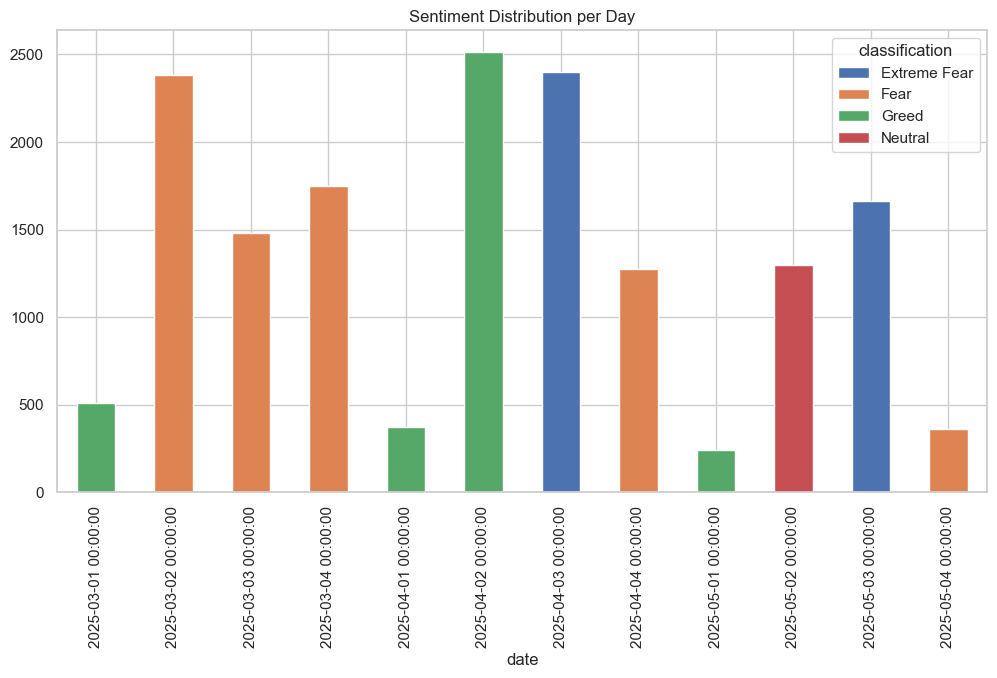

In [41]:
#📅 Daily Sentiment Trend
daily_sentiment = merged_df.groupby(['date', 'classification']).size().unstack(fill_value=0)
daily_sentiment.plot(kind='bar', stacked=True, figsize=(12,6), title="Sentiment Distribution per Day")


<Axes: title={'center': 'Total PnL Over Time'}, xlabel='date'>

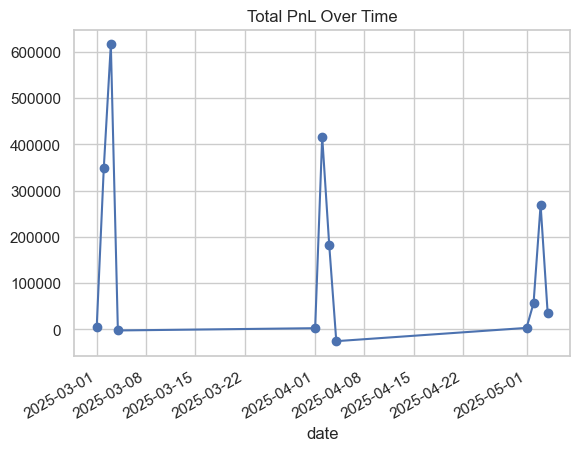

In [43]:
#💰 Total PnL Over Time
merged_df.groupby('date')['Closed PnL'].sum().plot(title="Total PnL Over Time", marker='o')

In [45]:
#SAVING TO csv file
merged_df.to_csv("merged_bitcoin_sentiment.csv", index=False)